In [2]:
# import the necessary packages
import numpy as np
import argparse
import cv2
import imutils
import matplotlib.pyplot as plt



STEP 1: Edge Detection


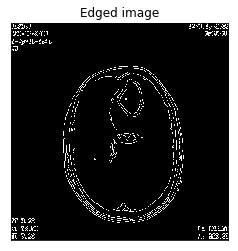

In [3]:
##-----------------------Canny Edge Detection------------------------##

# load the image and compute the ratio of the old height
# to the new height, clone it, and resize it
image = cv2.imread("images/a.png")
ratio = image.shape[0] / 500.0
orig = image.copy()
image = imutils.resize(image, height = 500, width = 500)
 
# convert the image to grayscale, blur it, and find edges
# in the image
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
gray = cv2.GaussianBlur(gray, (5, 5), 0)
edged = cv2.Canny(gray, 75, 200)
 
# show the original image and the edge detected image
print("STEP 1: Edge Detection")

# plt.subplot(1, 2, 1)
# plt.imshow(image, cmap='gray')
# plt.title('Image')
# plt.xticks([]), plt.yticks([])

# plt.subplot(1, 2, 2) # row, col, current_col
# plt.imshow(edged, cmap='gray')
# plt.title("Edged image")
# plt.xticks([]), plt.yticks([])

plt.imshow(edged, cmap='gray')
plt.title("Edged image")
plt.xticks([]), plt.yticks([])
plt.show()

plt.show()



STEP 2: Find contours of paper


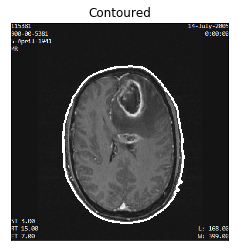

In [4]:
##-----------------------Contouring------------------------##


# find the contours in the edged image, keeping only the
# largest ones, and initialize the screen contour
cnts = cv2.findContours(edged.copy(), cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)
cnts = cnts[0] if imutils.is_cv2() else cnts[1]
cnts = sorted(cnts, key = cv2.contourArea, reverse = True)[:5]

 
# show the contour (outline) of the piece of paper
print("STEP 2: Find contours of paper")
cnt = cnts[1]
#draw individual contours
# cv2.drawContours(image, cnts, 3, (0,255,0), 3)
# cv2.drawContours(image, cnts, 1, (0,255,0), 3)

#draw all the contours
#cv2.drawContours(image, cnts, -1, (0,255,0), 3)

# draw 0th contour
# 4 = index of the contour to be drwan
# 5 = thickness of the contour to be drawn

# index = 0;
# for c in cnts:
    
#     cv2.drawContours(image, [c], 0, (0, 255, 0), 5)
#     plt.imshow(image)
#     plt.title(index)
#     plt.xticks([]), plt.yticks([])
#     plt.show()
#     index = index + 1;

#to draw all the contours, use -1
cv2.drawContours(image, cnts, 0, (255,255,255), 3)

plt.imshow(image, cmap='gray')
plt.title("Contoured")
plt.xticks([]), plt.yticks([])
plt.show()

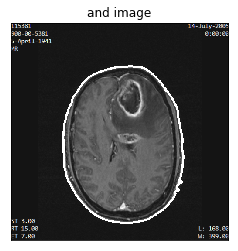

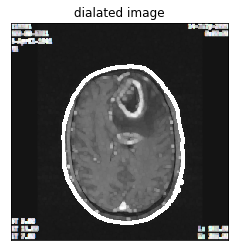

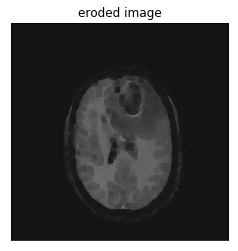

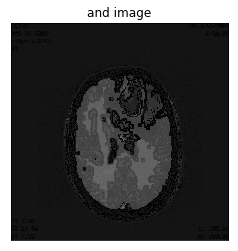

In [20]:
#now, need to perform erosion and filation
#Taking a matrix of size 5 as the kernel 
kernel = np.ones((5,5), np.uint8) 

# The first parameter is the original image, 
# kernel is the matrix with which image is  
# convolved and third parameter is the number  
# of iterations, which will determine how much  
# you want to erode/dilate a given image.  
# res_erosion = cv2.erode(image, kernel, iterations=1) 

# res_dilation = cv2.dilate(image, kernel, iterations=1) 
# plt.imshow(res_dilation, cmap='gray')
# plt.title("dialated image")
# plt.xticks([]), plt.yticks([])
# plt.show()

# plt.imshow(res_erosion, cmap='gray')
# plt.title("eroded image")
# plt.xticks([]), plt.yticks([])
# plt.show()

mask = np.ones(image.shape[:2], dtype="uint8") * 255
# plt.imshow(mask, cmap='gray')
# plt.title("mask image")
# plt.xticks([]), plt.yticks([])
# plt.show()

# remove the contours from the image and show the resulting images
and_image = cv2.bitwise_and(image, image, mask)
plt.imshow(and_image, cmap='gray')
plt.title("and image")
plt.xticks([]), plt.yticks([])
plt.show()



res_dilation = cv2.dilate(image, kernel, iterations=1) 
plt.imshow(res_dilation, cmap='gray')
plt.title("dialated image")
plt.xticks([]), plt.yticks([])
plt.show()

res_erosion = cv2.erode(image, kernel, iterations=2) 
plt.imshow(res_erosion, cmap='gray')
plt.title("eroded image")
plt.xticks([]), plt.yticks([])
plt.show()

# remove the contours from the image and show the resulting images
and_image = cv2.bitwise_and(image, res_erosion, mask)
plt.imshow(and_image, cmap='gray')
plt.title("and image")
plt.xticks([]), plt.yticks([])
plt.show()
